# Install packages

In [1]:
!pip install pandas matplotlib seaborn scipy windrose nltk textblob



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip freeze > ../requirements.txt


# Importing libraries

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

Extract datasets from the data.zip

In [4]:
# import sys
# sys.path.append('..')
# from utils.utils import extract_datasets

# # import zipfile
# # with zipfile.Zipfile("../../datasets/raw_analyst_ratings.csv.zip", "r") as f:
# #     f.extractall("../datasets/raw")

# data_folder = r"../../datasets"
# data_path = os.path.join(data_folder, "raw_analyst_ratings.csv.zip")
# extract_datasets(data_path, r"../datasets/raw")


In [5]:
# data_folder = r"../../datasets"
# data_path = os.path.join(data_folder, "yfinance_data.zip")
# extract_datasets(data_path, r"../datasets/raw")

# Load dataset raw_analyst_ratings.csv and make initial analysis

In [6]:
data_folder = r"../datasets/raw"
data_path = os.path.join(data_folder, "raw_analyst_ratings.csv")
df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [7]:
df # df.head(), df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [8]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)

remove the column unnamed
sort with date

In [11]:
unique_publishers = df['publisher'].unique()
unique_publishers_num = df['publisher'].nunique()
unique_publishers_num, unique_publishers

(1034,
 array(['Benzinga Insights', 'Lisa Levin', 'Vick Meyer', ...,
        'Robert Morris', 'LeftCoastHedgie', 'Jeremie Capron'],
       shape=(1034,), dtype=object))

In [12]:
unique_stocks = df['stock'].unique()
unique_stocks_num = df['stock'].nunique()
unique_stocks_num, unique_stocks


(6204,
 array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'],
       shape=(6204,), dtype=object))

In [13]:
df.sort_values(by='date', ascending=False)

,headline,url,publisher,date,stock
1343658,Quicken Loans Plans To IPO: Report,https://www.benzinga.com/news/20/06/16238300/q...,Jason Shubnell,2020-06-11 17:12:35-04:00,WFC
980443,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG
1269090,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR
1357564,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,JJ Kinahan,2020-06-11 16:51:33-04:00,WMT
1039004,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH
...,...,...,...,...,...
67712,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22 00:00:00,AM
1432,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29 00:00:00,A
519806,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00,FT
1390006,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00,Y


In [14]:
df.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [15]:
# Check for missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [16]:
# Check for duplicates
df.duplicated().sum()

np.int64(1)

# Statistics summary

In [17]:
# Summary statistics for headline, url, publisher, date, stock columns
df[['headline', 'url', 'publisher', 'date', 'stock']].describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


In [18]:
# Articles per Publisher
articles_per_publisher = df['publisher'].value_counts()
articles_per_publisher

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

In [19]:
(articles_per_publisher == 1).sum()

np.int64(161)

In [20]:
# articles per stocks
articles_per_stocks = df['stock'].value_counts()
articles_per_stocks

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64

In [21]:
(articles_per_stocks == 1).sum()

np.int64(242)

In [39]:
# Convert all dates to the same timezone with UTC handling before creating the date range
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)

# Convert all dates to naive datetime objects
df['date'] = df['date'].dt.tz_localize(None)

# Now create the date range
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
missing_dates = date_range.difference(df['date'])
missing_dates, df['date'].min(), df['date'].max()


(DatetimeIndex(['2009-02-15', '2009-02-16', '2009-02-17', '2009-02-18',
                '2009-02-19', '2009-02-20', '2009-02-21', '2009-02-22',
                '2009-02-23', '2009-02-24',
                ...
                '2016-12-25', '2017-01-01', '2017-01-14', '2017-08-05',
                '2017-09-30', '2017-11-18', '2017-11-25', '2018-03-03',
                '2018-04-28', '2018-08-04'],
               dtype='datetime64[ns]', length=181, freq=None),
 Timestamp('2009-02-14 00:00:00'),
 Timestamp('2020-06-11 00:00:00'))

In [23]:
df['headline'].apply(len)

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline, Length: 1407328, dtype: int64

In [24]:
df['headline'].apply(len).min(), df['headline'].apply(len).max()

(np.int64(3), np.int64(512))

In [28]:
# Headline Length Statistics
df['headline_length'] = df['headline'].apply(len)
headline_length_stats = df[['headline_length']].describe()

headline_length_stats

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


In [29]:
# Analyze the publication dates to see trends over time
df['date'] = pd.to_datetime(df['date'], format='mixed').dt.normalize()
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [30]:
# Articles per Year
articles_per_year = df['year'].value_counts().sort_index()
articles_per_year

year
2009     11489
2010     81319
2011    131322
2012    122649
2013    121529
2014    134859
2015    135295
2016    141892
2017    124456
2018    146924
2019    150380
2020    105214
Name: count, dtype: int64

In [31]:
# Articles per Month
articles_per_month = df['month'].value_counts().sort_index()
articles_per_month

month
1     121545
2     122836
3     121949
4     121813
5     130340
6     106598
7     110764
8     124041
9      96089
10    124800
11    121430
12    105123
Name: count, dtype: int64

In [32]:
# Articles per Day of the Week
articles_per_day_of_week = df['day_of_week'].value_counts().sort_index()
articles_per_day_of_week

# day_of_week
# 0    265139  # Monday
# 1    296505  # Tuesday
# 2    300922  # Wednesday
# 3    302619  # Thursday
# 4    217918  # Friday
# 5      7759  # Saturday
# 6     16466  # Sunday

day_of_week
0    265139
1    296505
2    300922
3    302619
4    217918
5      7759
6     16466
Name: count, dtype: int64

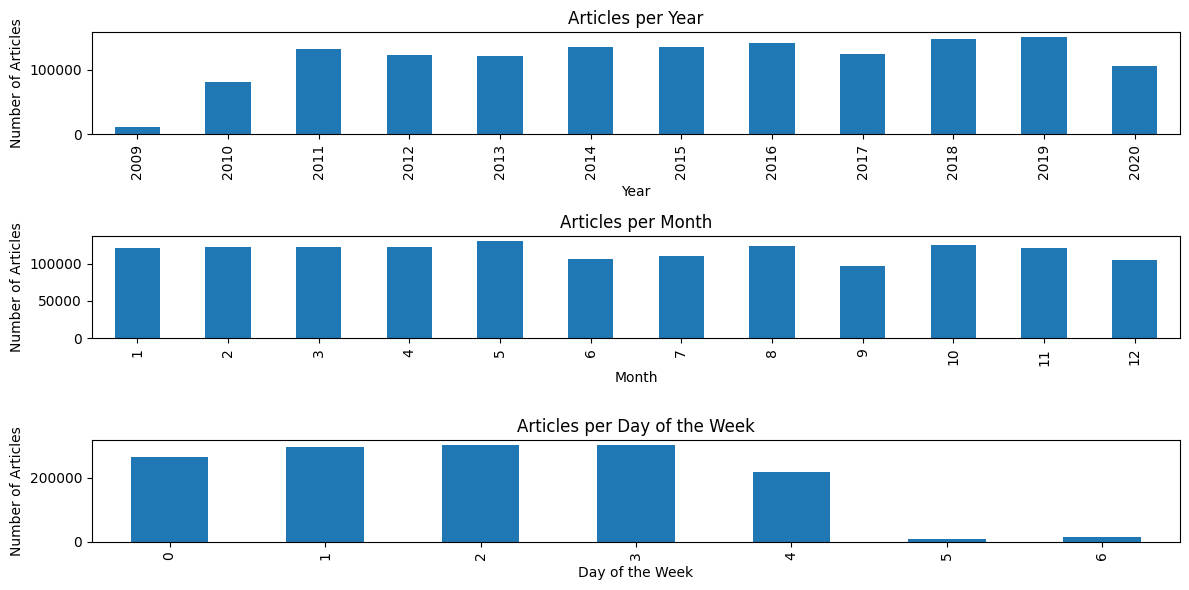

In [33]:

# Plotting the trends
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
articles_per_year.plot(kind='bar', title='Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 2)
articles_per_month.plot(kind='bar', title='Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 3)
articles_per_day_of_week.plot(kind='bar', title='Articles per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()

In [34]:
# Articles per Month of Each Year
articles_per_month_year = df.groupby(['year', 'month']).size().unstack(fill_value=0)
articles_per_month_year


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,0,1,0,3,12,40,75,3633,1023,1330,2262,3110
2010,3807,4130,4739,4007,5098,4707,4958,7481,8098,8581,11516,14197
2011,14307,8250,8901,10583,12275,11563,13573,12728,8313,10714,10848,9267
2012,10529,11708,10441,10674,11162,9249,10763,10316,8094,11486,10116,8111
2013,10838,10945,10343,11294,10657,9270,11076,10152,8548,10686,9490,8230
2014,9394,10428,9674,10752,11843,10286,12159,11525,10529,14539,12226,11504
2015,12530,12350,11588,11611,11734,12109,11677,10829,8558,11098,10738,10473
2016,11437,12860,11778,11900,11627,11568,11231,13789,10622,12299,13215,9566
2017,10660,10896,10585,9217,11441,12816,9304,10445,7642,11213,12017,8220


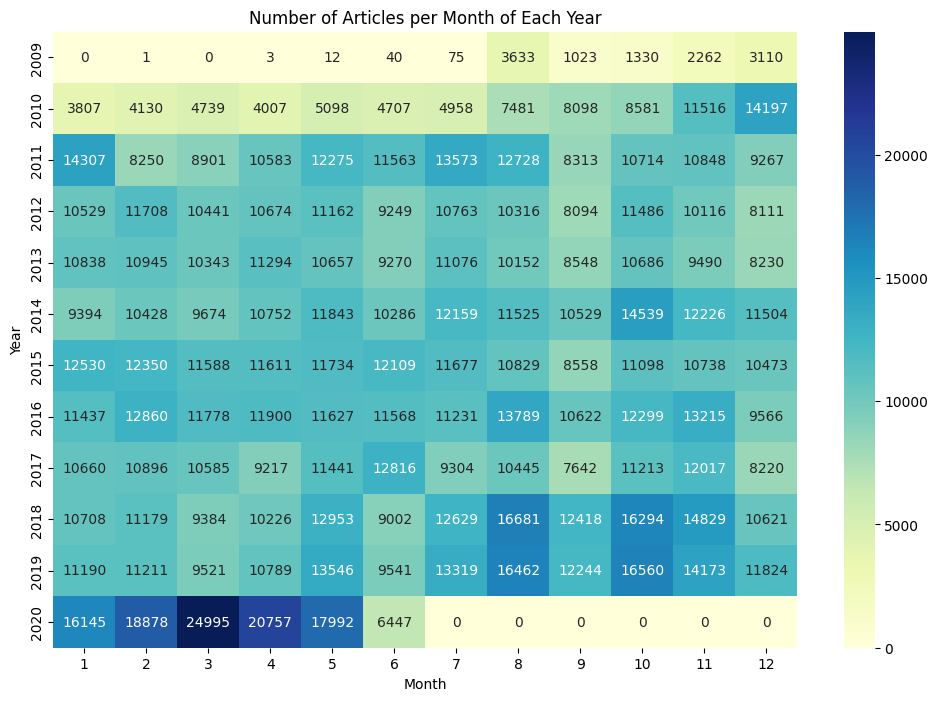

In [35]:
# Plotting the number of articles per month of each year
plt.figure(figsize=(12, 8))
sns.heatmap(articles_per_month_year, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Number of Articles per Month of Each Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()



<Figure size 1200x800 with 0 Axes>

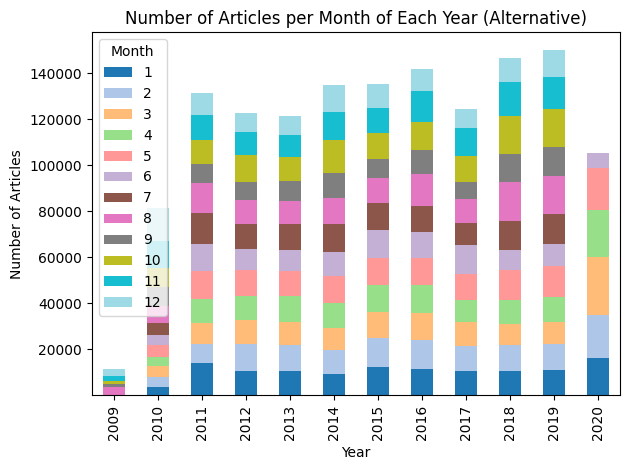

In [36]:
# Alternative plot for the number of articles per month of each year
plt.figure(figsize=(12, 8))
articles_per_month_year.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Number of Articles per Month of Each Year (Alternative)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

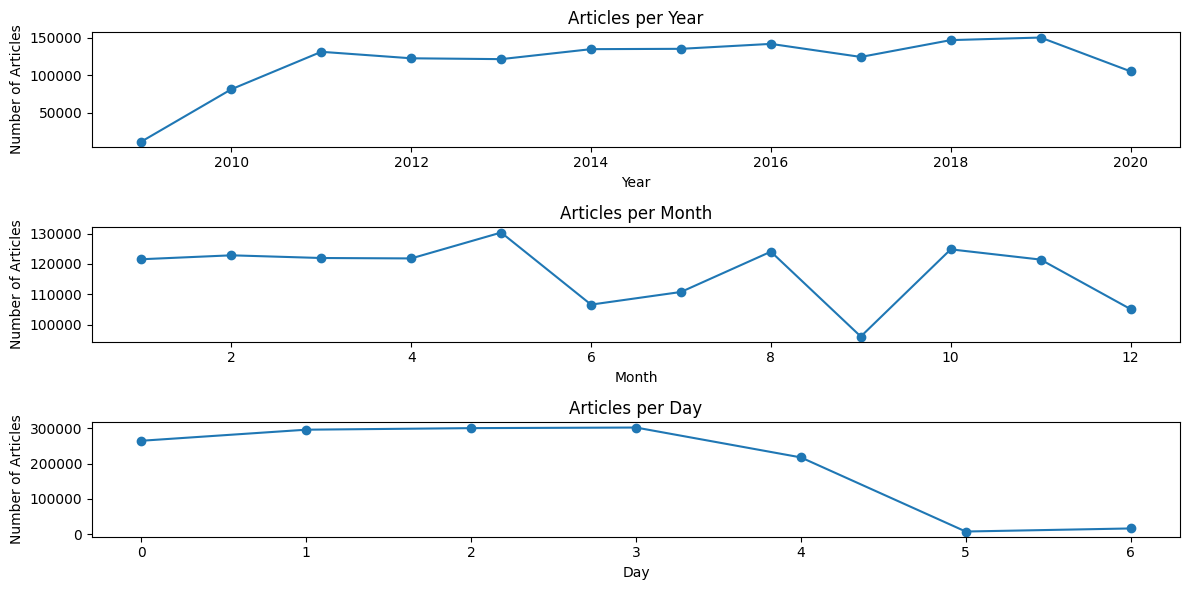

In [37]:
# Another alternative figure for the above
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
articles_per_year.plot(kind='line', marker='o', title='Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 2)
articles_per_month.plot(kind='line', marker='o', title='Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

plt.subplot(3, 1, 3)
articles_per_day_of_week.plot(kind='line', marker='o', title='Articles per Day')
plt.xlabel('Day')
plt.ylabel('Number of Articles')

plt.tight_layout()
plt.show()
